**Datos del mes de junio-diciembre del 2014**


Transformada de Fourier y análisis Tiempo-Frecuencia de la temperatura y la velocidad del viento.

**Cargar paqueterías**

In [1]:
using DataFrames

In [2]:
using CSV

In [3]:
using Plots

In [4]:
pyplot()

Plots.PyPlotBackend()

In [5]:
using DSP

**Cargar datos**

In [6]:
Datos1=readtable("2014-06-JQRO_minuto_L1-F.csv");
Datos2=readtable("2014-07-JQRO_minuto_L1-F.csv");
Datos3=readtable("2014-08-JQRO_minuto_L1-F.csv");
Datos4=readtable("2014-09-JQRO_minuto_L1-F.csv");
Datos5=readtable("2014-10-JQRO_minuto_L1-F.csv");
Datos6=readtable("2014-11-JQRO_minuto_L1-F.csv");
Datos7=readtable("2014-12-JQRO_minuto_L1-F.csv");

In [7]:
#Modifico la variable de tiempo junio
Tiempo1 = DateTime[]
for i=1:length(Datos1[:,1])

    push!(Tiempo1,DateTime(Datos1[i,1],"d/m/y HH:MM"))
    
end

In [8]:
#Modifico la variable de tiempo ju1io
Tiempo2 = DateTime[]
for i=1:length(Datos2[:,1])

    push!(Tiempo2,DateTime(Datos2[i,1],"d/m/y HH:MM"))
    
end

In [9]:
#Modifico la variable de tiempo agosto
Tiempo3 = DateTime[]
for i=1:length(Datos3[:,1])

    push!(Tiempo3,DateTime(Datos3[i,1],"d/m/y HH:MM"))
    
end

In [10]:
#Modifico la variable de tiempo septiembre
Tiempo4 = DateTime[]
for i=1:length(Datos4[:,1])

    push!(Tiempo4,DateTime(Datos4[i,1],"d/m/y HH:MM"))
    
end

In [11]:
#Modifico la variable de tiempo octubre
Tiempo5 = DateTime[]
for i=1:length(Datos5[:,1])

    push!(Tiempo5,DateTime(Datos5[i,1],"d/m/y HH:MM"))
    
end

In [12]:
#Modifico la variable de tiempo noviembre
Tiempo6 = DateTime[]
for i=1:length(Datos6[:,1])

    push!(Tiempo6,DateTime(Datos6[i,1],"d/m/y HH:MM"))
    
end

In [13]:
#Modifico la variable de tiempo diciembre
Tiempo7 = DateTime[]
for i=1:length(Datos7[:,1])

    push!(Tiempo7,DateTime(Datos7[i,1],"d/m/y HH:MM"))
    
end

In [14]:
 #Omito missing del tiempo
Tiempo1=collect(skipmissing(Tiempo1));
Tiempo2=collect(skipmissing(Tiempo2)); 
Tiempo3=collect(skipmissing(Tiempo3)); 
#Tiempo4=collect(skipmissing(Tiempo4); 
Tiempo5=collect(skipmissing(Tiempo5));
Tiempo6=collect(skipmissing(Tiempo6)); 
Tiempo7=collect(skipmissing(Tiempo7)); 

In [15]:
 #Omito missing de la temperatura
Temp1=collect(skipmissing(Datos1[:, 2])); Temp2=collect(skipmissing(Datos2[:, 2])); Temp3=collect(skipmissing(Datos3[:, 2])); Temp4=collect(skipmissing(Datos4[:, 2]));
Temp5=collect(skipmissing(Datos5[:, 2])); Temp6=collect(skipmissing(Datos6[:, 2])); Temp7=collect(skipmissing(Datos7[:, 2]));

 #Omito missing de la velocidad del viento
VelViento1=collect(skipmissing(Datos1[:, 4])); VelViento2=collect(skipmissing(Datos2[:, 4])); VelViento3=collect(skipmissing(Datos3[:, 4])); VelViento4=collect(skipmissing(Datos4[:, 4])); VelViento5=collect(skipmissing(Datos5[:, 4])); VelViento6=collect(skipmissing(Datos6[:, 4])); VelViento7=collect(skipmissing(Datos7[:, 4])); 

 #Omito missing de la dirección del tiempo
DirViento1=collect(skipmissing(Datos1[:, 6])); DirViento2=collect(skipmissing(Datos2[:, 6])); DirViento3=collect(skipmissing(Datos3[:, 6])); DirViento4=collect(skipmissing(Datos4[:, 6])); DirViento5=collect(skipmissing(Datos5[:, 6])); DirViento6=collect(skipmissing(Datos6[:, 6])); DirViento7=collect(skipmissing(Datos7[:, 6])); 

**DATOS DE JUNIO**

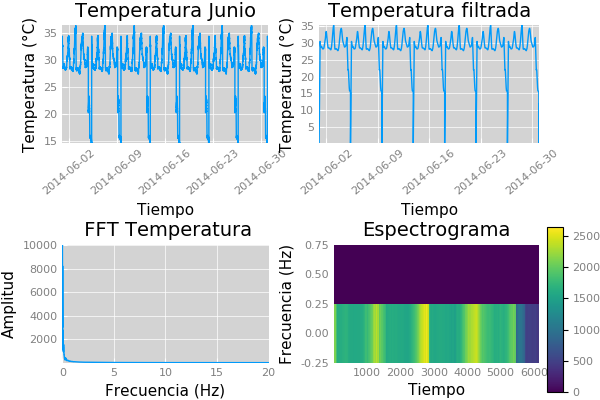

In [16]:
#TEMPERATURA JUNIO

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
T1= plot(Tiempo1, Temp1, ylab="Temperatura (°C)", xlabel="Tiempo", title="Temperatura Junio", xrotation=40, leg=false) 

#Filtro media móvil
VT1=ones(200)*(1/200) #Ventana de tiempo
CVT1=filt(VT1,1,Temp1); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
TF1=plot(Tiempo1,CVT1, ylab="Temperatura (°C)",xlabel="Tiempo", title="Temperatura filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt1 = abs.(fft(CVT1,1));
F1=(floor(length(ftt1)/1 +1)/2) #Hacer el número par
fttp1 = ftt1[2:convert(Int64,F1)] 
fvec1t = collect(linspace(0,20,length(fttp1)))
PF1 = plot(fvec1t,fttp1, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Temperatura", label=false, leg=false)


#Espectograma
spe1=spectrogram(Temp1,2,1,fs=1)
fig1=heatmap(spe1.time,spe1.freq,spe1.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(T1, TF1, PF1, fig1)



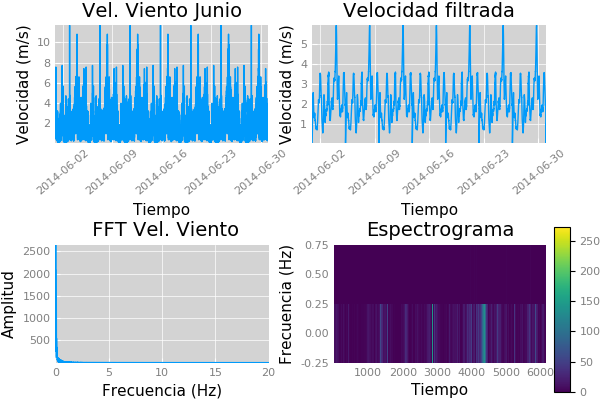

In [17]:
#VELOCIDAD DEL VIENTO JUNIO

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
V1= plot(Tiempo1, VelViento1, ylab="Velocidad (m/s)", xlabel="Tiempo", title="Vel. Viento Junio", xrotation=40, leg=false) 

#Filtro media móvil
VV1=ones(200)*(1/200) #Ventana de tiempo
CVV1=filt(VV1,1,VelViento1); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
VF1=plot(Tiempo1,CVV1, ylab="Velocidad (m/s)",xlabel="Tiempo", title="Velocidad filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt1V = abs.(fft(CVV1,1));
FV1=(floor(length(ftt1V)/1 +1)/2) #Hacer el número par
fttp1V = ftt1V[2:convert(Int64,FV1)] 
fvec1tV = collect(linspace(0,20,length(fttp1V)))
PFV1 = plot(fvec1tV,fttp1V, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Vel. Viento", label=false, leg=false)


#Espectograma
spe1V=spectrogram(VelViento1,2,1,fs=1)
fig1V=heatmap(spe1V.time,spe1V.freq,spe1V.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(V1, VF1, PFV1, fig1V)

**DATOS DE JULIO**

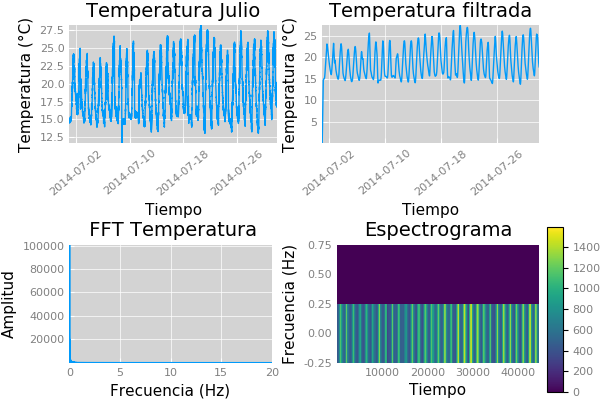

In [52]:
#TEMPERATURA JULIO

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
T2= plot(Tiempo2, Temp2, ylab="Temperatura (°C)", xlabel="Tiempo", title="Temperatura Julio", xrotation=40, leg=false) 

#Filtro media móvil
VT2=ones(200)*(1/200) #Ventana de tiempo
CVT2=filt(VT2,1,Temp2); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
TF2=plot(Tiempo2,CVT2, ylab="Temperatura (°C)",xlabel="Tiempo", title="Temperatura filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt2 = abs.(fft(CVT2,1));
F2=(floor(length(ftt2)/1 +2)/2) #Hacer el número par
fttp2 = ftt2[2:convert(Int64, F2)] #Da error y es par
fvec2t = collect(linspace(0,20,length(fttp2)))
PF2 = plot(fvec2t,fttp2, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Temperatura", label=false, leg=false)


#Espectograma
spe2=spectrogram(Temp2,2,1,fs=1)
fig2=heatmap(spe2.time,spe2.freq,spe2.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(T2, TF2, PF2, fig2)


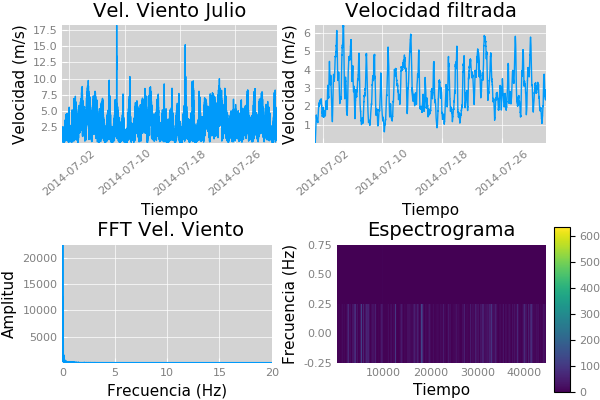

In [53]:
#VELOCIDAD DEL VIENTO JULIO

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
V2= plot(Tiempo2, VelViento2, ylab="Velocidad (m/s)", xlabel="Tiempo", title="Vel. Viento Julio", xrotation=40, leg=false) 

#Filtro media móvil
VV2=ones(200)*(1/200) #Ventana de tiempo
CVV2=filt(VV2,1,VelViento2); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
VF2=plot(Tiempo2,CVV2, ylab="Velocidad (m/s)",xlabel="Tiempo", title="Velocidad filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt2V = abs.(fft(CVV2,1));
F2V=(floor(length(ftt2V)/1 +2)/2) #Hacer el número par
fttp2V = ftt2V[2:convert(Int64,F2V)] #Da error, el número es par
fvec2tV = collect(linspace(0,20,length(fttp2V)))
PFV2 = plot(fvec2tV,fttp2V, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Vel. Viento", label=false, leg=false)


#Espectograma
spe2V=spectrogram(VelViento2,2,1,fs=1)
fig2V=heatmap(spe2V.time,spe2V.freq,spe2V.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(V2, VF2, PFV2,fig2V)

**Datos de agosto**

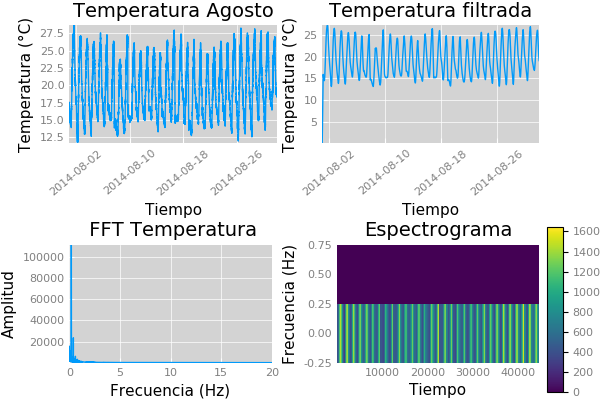

In [27]:
#TEMPERATURA AGOSTO

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
T3= plot(Tiempo3, Temp3, ylab="Temperatura (°C)", xlabel="Tiempo", title="Temperatura Agosto", xrotation=40, leg=false) 

#Filtro media móvil
VT3=ones(200)*(1/200) #Ventana de tiempo
CVT3=filt(VT3,1,Temp3); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
TF3=plot(Tiempo3,CVT3, ylab="Temperatura (°C)",xlabel="Tiempo", title="Temperatura filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt3 = abs.(fft(CVT3,1));
F3=(floor(length(ftt1)/1 +1)/2) #Hacer el número par
fttp3 = ftt3[2:convert(Int64,F3)] 
fvec3t = collect(linspace(0,20,length(fttp3)))
PF3 = plot(fvec3t,fttp3, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Temperatura", label=false, leg=false)

#Espectograma
spe3=spectrogram(Temp3,2,1,fs=1)
fig3=heatmap(spe3.time,spe3.freq,spe3.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(T3, TF3, PF3, fig3)

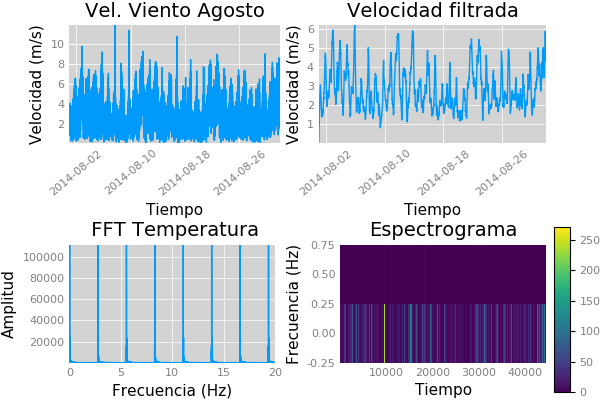

In [55]:
#VELOCIDAD DEL VIENTO AGOSTO

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
V3= plot(Tiempo3, VelViento3, ylab="Velocidad (m/s)", xlabel="Tiempo", title="Vel. Viento Agosto", xrotation=40, leg=false) 

#Filtro media móvil
VV3=ones(200)*(1/200) #Ventana de tiempo
CVV3=filt(VV3,1,VelViento3); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
VF3=plot(Tiempo3,CVV3, ylab="Velocidad (m/s)",xlabel="Tiempo", title="Velocidad filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt3V= abs.(fft(CVV3,1));
F3=(floor(length(ftt3V)/1 +2)/2) #Hacer el número par
fttp3V = ftt3V[2:convert(Int64,F3)] #Da error y es par
fvec3t = collect(linspace(0,20,length(fttp3V)))
PFV3 = plot(fvec3t,fttp3, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Temperatura", label=false, leg=false)
ftt2V = abs.(fft(CVV2,1));

#Espectograma
spe3V=spectrogram(VelViento3,2,1,fs=1)
fig3V=heatmap(spe3V.time,spe3V.freq,spe3V.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(V3, VF3, PFV3, fig3V)

**DATOS SEPTIEMBRE**

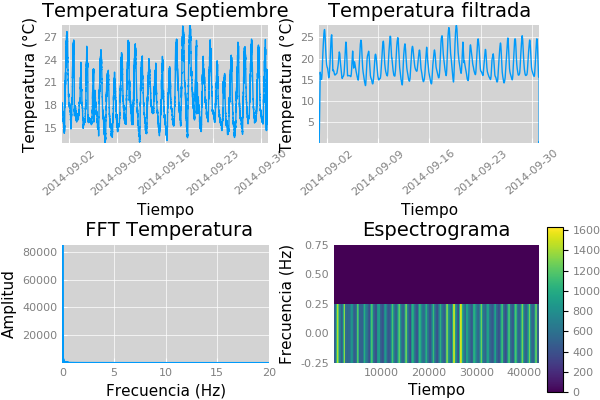

In [37]:
#TEMPERATURA SEPTIEMBRE

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
T4= plot(Tiempo4, Temp4, ylab="Temperatura (°C)", xlabel="Tiempo", title="Temperatura Septiembre", xrotation=40, leg=false) 

#Filtro media móvil
VT4=ones(200)*(1/200) #Ventana de tiempo
CVT4=filt(VT4,1,Temp4); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
TF4=plot(Tiempo4,CVT4, ylab="Temperatura (°C)",xlabel="Tiempo", title="Temperatura filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt4 = abs.(fft(CVT4,1));
F4=(floor(length(ftt4)/1 +1)/2) #Hacer el número par
fttp4 = ftt4[2:convert(Int64,F4)] 
fvec4t = collect(linspace(0,20,length(fttp4)))
PF4 = plot(fvec4t,fttp4, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Temperatura", label=false, leg=false)

#Espectograma
spe4=spectrogram(Temp4,2,1,fs=1)
fig4=heatmap(spe4.time,spe4.freq,spe4.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(T4, TF4, PF4, fig4)

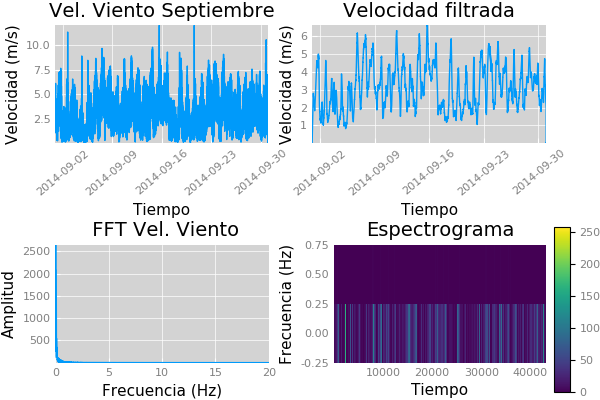

In [38]:
#VELOCIDAD DEL VIENTO SEPTIEMBRE

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
V4= plot(Tiempo4, VelViento4, ylab="Velocidad (m/s)", xlabel="Tiempo", title="Vel. Viento Septiembre", xrotation=40, leg=false) 

#Filtro media móvil
VV4=ones(200)*(1/200) #Ventana de tiempo
CVV4=filt(VV4,1,VelViento4); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
VF4=plot(Tiempo4,CVV4, ylab="Velocidad (m/s)",xlabel="Tiempo", title="Velocidad filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt4V = abs.(fft(CVV4,1));
FV4=(floor(length(ftt4V)/1 +1)/2) #Hacer el número par
fttp4V = ftt4V[2:convert(Int64,FV4)] 
fvec4tV = collect(linspace(0,20,length(fttp4V)))
PFV4 = plot(fvec1tV,fttp1V, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Vel. Viento", label=false, leg=false)


#Espectograma
spe4V=spectrogram(VelViento4,2,1,fs=1)
fig4V=heatmap(spe4V.time,spe4V.freq,spe4V.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(V4, VF4, PFV4, fig4V)

**DATOS OCTUBRE**

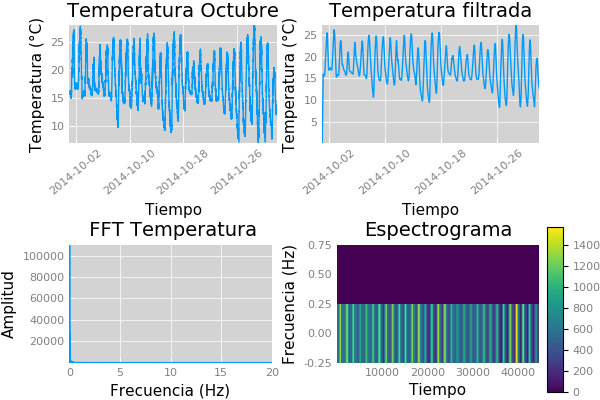

In [56]:
#TEMPERATURA OCTUBRE

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
T5= plot(Tiempo5, Temp5, ylab="Temperatura (°C)", xlabel="Tiempo", title="Temperatura Octubre", xrotation=40, leg=false) 

#Filtro media móvil
VT5=ones(200)*(1/200) #Ventana de tiempo
CVT5=filt(VT5,1,Temp5); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
TF5=plot(Tiempo5,CVT5, ylab="Temperatura (°C)",xlabel="Tiempo", title="Temperatura filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt5= abs.(fft(CVT5,1));
F5=(floor(length(ftt5)/1 +2)/2) #Hacer el número par
fttp5 = ftt5[2:convert(Int64,F5)] #Da error y es número par
fvec5t = collect(linspace(0,20,length(fttp5)))
PF5 = plot(fvec5t,fttp5, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Temperatura", label=false, leg=false)

#Espectograma
spe5=spectrogram(Temp5,2,1,fs=1)
fig5=heatmap(spe5.time,spe5.freq,spe5.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(T5, TF5, PF5, fig5)

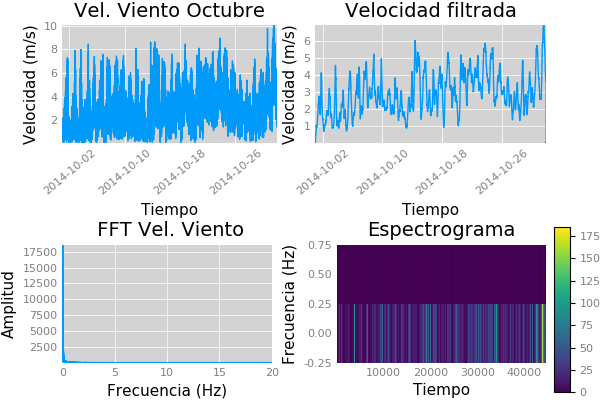

In [39]:
#VELOCIDAD DEL VIENTO OCTUBRE

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
V5= plot(Tiempo5, VelViento5, ylab="Velocidad (m/s)", xlabel="Tiempo", title="Vel. Viento Octubre", xrotation=40, leg=false) 

#Filtro media móvil
VV5=ones(200)*(1/200) #Ventana de tiempo
CVV5=filt(VV5,1,VelViento5); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
VF5=plot(Tiempo5,CVV5, ylab="Velocidad (m/s)",xlabel="Tiempo", title="Velocidad filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt5V = abs.(fft(CVV5,1));
FV5=(floor(length(ftt5V)/1 +1)/2) #Hacer el número par
fttp5V = ftt5V[2:convert(Int64,FV5)] 
fvec5tV = collect(linspace(0,20,length(fttp5V)))
PFV5 = plot(fvec5tV,fttp5V, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Vel. Viento", label=false, leg=false)


#Espectograma
spe5V=spectrogram(VelViento5,2,1,fs=1)
fig5V=heatmap(spe5V.time,spe5V.freq,spe5V.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(V5, VF5, PFV5, fig5V)

**Datos Noviembre**

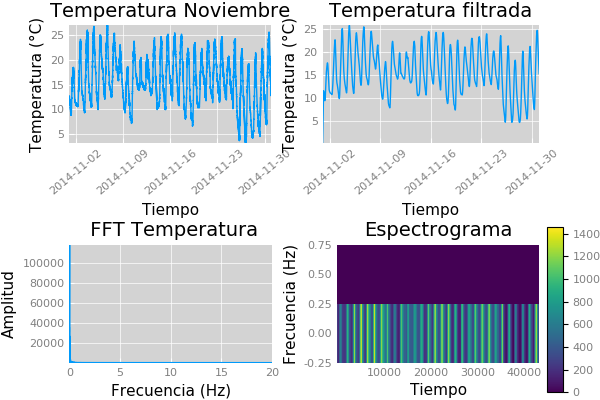

In [50]:
#TEMPERATURA NOVIEMBRE

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
T6= plot(Tiempo6, Temp6, ylab="Temperatura (°C)", xlabel="Tiempo", title="Temperatura Noviembre", xrotation=40, leg=false) 

#Filtro media móvil
VT6=ones(200)*(1/200) #Ventana de tiempo
CVT6=filt(VT6,1,Temp6); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
TF6=plot(Tiempo6,CVT6, ylab="Temperatura (°C)",xlabel="Tiempo", title="Temperatura filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt6 = abs.(fft(CVT6,1));
F6=(floor(length(ftt6)/1 +2)/2) #Hacer el número par
fttp6 = ftt6[2:convert(Int64,F6)] 
fvec6t = collect(linspace(0,20,length(fttp6)))
PF6 = plot(fvec6t,fttp6, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Temperatura", label=false, leg=false)

#Espectograma
spe6=spectrogram(Temp6,2,1,fs=1)
fig6=heatmap(spe6.time,spe6.freq,spe6.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(T6, TF6, PF6, fig6)

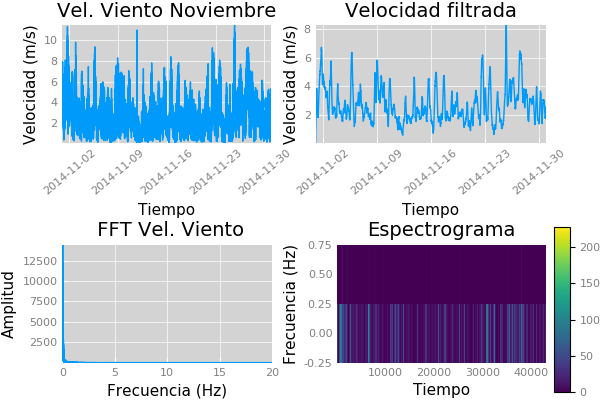

In [58]:
#VELOCIDAD DEL VIENTO NOVIEMBRE

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
V6= plot(Tiempo6, VelViento6, ylab="Velocidad (m/s)", xlabel="Tiempo", title="Vel. Viento Noviembre", xrotation=40, leg=false) 

#Filtro media móvil
VV6=ones(200)*(1/200) #Ventana de tiempo
CVV6=filt(VV6,1,VelViento6); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
VF6=plot(Tiempo6,CVV6, ylab="Velocidad (m/s)",xlabel="Tiempo", title="Velocidad filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt6V = abs.(fft(CVV6,1));
FV6=(floor(length(ftt6V)/1 +2)/2) 
fttp6V = ftt6V[2:convert(Int64,FV6)] #Da error y es par
fvec6tV = collect(linspace(0,20,length(fttp6V)))
PFV6 = plot(fvec6tV,fttp6V, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Vel. Viento", label=false, leg=false)


#Espectograma
spe6V=spectrogram(VelViento6,2,1,fs=1)
fig6V=heatmap(spe6V.time,spe6V.freq,spe6V.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(V6, VF6, PFV6, fig6V)

**Datos Diciembre**

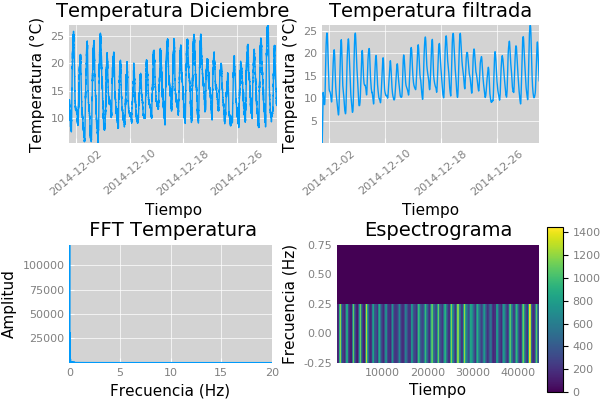

In [63]:
#TEMPERATURA DICIEMBRE

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
T7= plot(Tiempo7, Temp7, ylab="Temperatura (°C)", xlabel="Tiempo", title="Temperatura Diciembre", xrotation=40, leg=false) 

#Filtro media móvil
VT7=ones(200)*(1/200) #Ventana de tiempo
CVT7=filt(VT7,1,Temp7); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
TF7=plot(Tiempo7,CVT7, ylab="Temperatura (°C)",xlabel="Tiempo", title="Temperatura filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt7 = abs.(fft(CVT7,1));
F7=(floor(length(ftt7)/1 +2)/2) #Hacer el número par
fttp7 = ftt7[2:convert(Int64,F7)] #Da error y es par
fvec7t = collect(linspace(0,20,length(fttp7)))
PF7 = plot(fvec7t,fttp7, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Temperatura", label=false, leg=false)

#Espectograma
spe7=spectrogram(Temp7,2,1,fs=1)
fig7=heatmap(spe7.time,spe7.freq,spe7.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(T7, TF7, PF7, fig7)

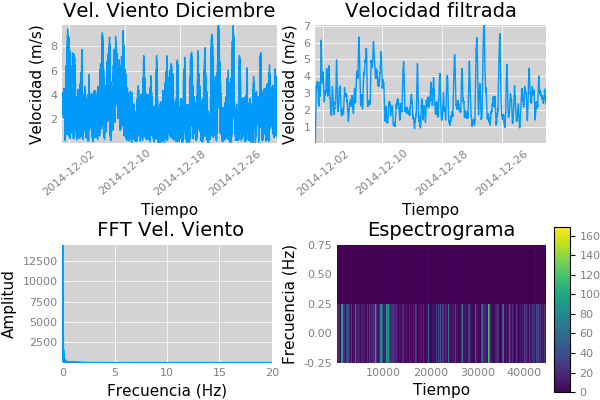

In [64]:
#VELOCIDAD DEL VIENTO DICIEMBRE

#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
V7= plot(Tiempo7, VelViento7, ylab="Velocidad (m/s)", xlabel="Tiempo", title="Vel. Viento Diciembre", xrotation=40, leg=false) 

#Filtro media móvil
VV7=ones(200)*(1/200) #Ventana de tiempo
CVV7=filt(VV7,1,VelViento7); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
VF7=plot(Tiempo7,CVV7, ylab="Velocidad (m/s)",xlabel="Tiempo", title="Velocidad filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt7V = abs.(fft(CVV7,1));
FV7=(floor(length(ftt7V)/1 + 2)/2) 
fttp7V = ftt7V[2:convert(Int64,FV7)] #Da error y es par
fvec7tV = collect(linspace(0,20,length(fttp7V)))
PFV7 = plot(fvec7tV,fttp7V, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Vel. Viento", label=false, leg=false)


#Espectograma
spe7V=spectrogram(VelViento7,2,1,fs=1)
fig7V=heatmap(spe7V.time,spe7V.freq,spe7V.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

plot(V7, VF7, PFV7, fig7V)